In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# Locating the file
HOME = Path() / '../'
WBANK = HOME / 'food-waste-dataset' / 'worldbank'
FAO = HOME / 'food-waste-dataset' / 'fao'

emi_pop_gdp_df = pd.read_csv(WBANK / 'emi_pop_gdp.csv', encoding='latin-1')
emi_waste_dis_df = pd.read_csv(FAO / 'emissions-waste-disposal' / 
                                     'F-clean-emissions-waste-disposal.csv', 
                                     encoding='latin-1')

In [4]:
print(emi_pop_gdp_df.columns)
print(emi_waste_dis_df.columns)
print(emi_waste_dis_df['Item'].unique())

Index(['country', 'year', 'population', 'emission', 'gdp'], dtype='object')
Index(['Area', 'Item', 'Element', 'Year', 'Value'], dtype='object')
['Domestic wastewater' 'Industrial wastewater' 'Solid food waste'
 'Waste - agri-food systems']


In [5]:
emi_waste_dis_df.rename(columns={
    'Area': 'country',
    'Item': 'cause',
    'Year': 'year',
    'Value': 'value',
    'Element': 'element'}, inplace=True)

In [6]:
dropna_emi_waste_dis_df = emi_waste_dis_df[~(emi_waste_dis_df['value'] == 0.0)]
print('Data from FAO: # countries:', len(emi_waste_dis_df['country'].unique()))
print('Data from FAO | dropna : # countries:', len(dropna_emi_waste_dis_df['country'].unique()))
dropna_emi_waste_dis_df[dropna_emi_waste_dis_df['country'] == 'France']

Data from FAO: # countries: 271
Data from FAO | dropna : # countries: 256


,country,cause,element,year,value
8310,France,Domestic wastewater,Emissions (CH4),1990,94.044990
8311,France,Domestic wastewater,Emissions (CH4),1991,94.567561
8312,France,Domestic wastewater,Emissions (CH4),1992,95.038963
8313,France,Domestic wastewater,Emissions (CH4),1993,95.451638
8314,France,Domestic wastewater,Emissions (CH4),1994,95.807630
...,...,...,...,...,...
8425,France,Waste - agri-food systems,Emissions (CH4),2015,235.387755
8426,France,Waste - agri-food systems,Emissions (CH4),2016,224.200250
8427,France,Waste - agri-food systems,Emissions (CH4),2017,227.672669
8428,France,Waste - agri-food systems,Emissions (CH4),2018,232.358211


In [7]:
# COUNTRIES FROM FAO AFTER DROPPING NAN VALUES
for i, c in enumerate(dropna_emi_waste_dis_df['country'].unique()):
    print(i, c)

0 Afghanistan
1 Albania
2 Algeria
3 American Samoa
4 Andorra
5 Angola
6 Antigua and Barbuda
7 Argentina
8 Armenia
9 Aruba
10 Australia
11 Austria
12 Azerbaijan
13 Bahamas
14 Bahrain
15 Bangladesh
16 Barbados
17 Belarus
18 Belgium
19 Belgium-Luxembourg
20 Belize
21 Benin
22 Bermuda
23 Bhutan
24 Bolivia (Plurinational State of)
25 Bosnia and Herzegovina
26 Botswana
27 Brazil
28 British Virgin Islands
29 Brunei Darussalam
30 Bulgaria
31 Burkina Faso
32 Burundi
33 Cabo Verde
34 Cambodia
35 Cameroon
36 Canada
37 Cayman Islands
38 Central African Republic
39 Chad
40 Chile
41 China
42 China, Hong Kong SAR
43 China, Macao SAR
44 China, mainland
45 Colombia
46 Comoros
47 Congo
48 Costa Rica
49 CÃ´te d'Ivoire
50 Croatia
51 Cuba
52 Cyprus
53 Czechia
54 Czechoslovakia
55 Democratic Republic of the Congo
56 Denmark
57 Djibouti
58 Dominica
59 Dominican Republic
60 Ecuador
61 Egypt
62 El Salvador
63 Equatorial Guinea
64 Eritrea
65 Estonia
66 Eswatini
67 Ethiopia
68 Ethiopia PDR
69 Faroe Islands
70 Fi

In [8]:
# COUNTRIES FROM WORDBANK AFTER DROPPING NAN VALUES
for i, c in enumerate(emi_pop_gdp_df.dropna()['country'].unique()):
    print(i, c)

0 Africa Eastern and Southern
1 Africa Western and Central
2 Angola
3 Albania
4 Andorra
5 Arab World
6 United Arab Emirates
7 Argentina
8 Armenia
9 Antigua and Barbuda
10 Australia
11 Austria
12 Azerbaijan
13 Burundi
14 Belgium
15 Benin
16 Burkina Faso
17 Bangladesh
18 Bulgaria
19 Bahrain
20 Bahamas, The
21 Belarus
22 Belize
23 Bolivia
24 Brazil
25 Barbados
26 Brunei Darussalam
27 Bhutan
28 Botswana
29 Central African Republic
30 Canada
31 Central Europe and the Baltics
32 Switzerland
33 Chile
34 China
35 Cote d'Ivoire
36 Cameroon
37 Congo, Dem. Rep.
38 Congo, Rep.
39 Colombia
40 Comoros
41 Cabo Verde
42 Costa Rica
43 Caribbean small states
44 Cuba
45 Cyprus
46 Czechia
47 Germany
48 Djibouti
49 Dominica
50 Denmark
51 Dominican Republic
52 Algeria
53 East Asia & Pacific (excluding high income)
54 Early-demographic dividend
55 East Asia & Pacific
56 Europe & Central Asia (excluding high income)
57 Europe & Central Asia
58 Ecuador
59 Egypt, Arab Rep.
60 Euro area
61 Spain
62 Ethiopia
63 E

In [9]:
waste_emi_pop_gdp_df = pd.merge(dropna_emi_waste_dis_df, emi_pop_gdp_df, how='outer')
waste_emi_pop_gdp_df

,country,cause,element,year,value,population,emission,gdp
0,Afghanistan,Domestic wastewater,Emissions (CH4),1990,15.855902,10694796.0,6739.999771,NaN
1,Afghanistan,Solid food waste,Emissions (CH4),1990,6.196943,10694796.0,6739.999771,NaN
2,Afghanistan,Waste - agri-food systems,Emissions (CH4),1990,22.052845,10694796.0,6739.999771,NaN
3,Afghanistan,Domestic wastewater,Emissions (CH4),1991,16.988608,10745167.0,7019.999981,NaN
4,Afghanistan,Solid food waste,Emissions (CH4),1991,5.836061,10745167.0,7019.999981,NaN
...,...,...,...,...,...,...,...,...
30401,"Venezuela, RB",NaN,NaN,2019,NaN,28971683.0,119239.997864,NaN
30402,Virgin Islands (U.S.),NaN,NaN,2019,NaN,106669.0,NaN,4.117000e+09
30403,Vietnam,NaN,NaN,2019,NaN,95776716.0,80480.003357,3.343653e+11
30404,Kosovo,NaN,NaN,2019,NaN,1788878.0,NaN,7.899879e+09


In [10]:
# But how many countries are there now that we merged?
print('Merged')
print(len(waste_emi_pop_gdp_df['country'].unique()))
print('WorldBank')
print(len(emi_pop_gdp_df['country'].unique()))
print('Fao')
print(len(emi_waste_dis_df['country'].unique()))

Merged
338
WorldBank
266
Fao
271


In [11]:
# What are the overlapping countries?
print(waste_emi_pop_gdp_df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' "CÃ´te d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Czechoslovakia' 'Democratic Republic of the Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Ethiopia PDR' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabo

In [12]:
waste_emi_pop_gdp_df['country'] = waste_emi_pop_gdp_df['country'].apply(str)

In [13]:
waste_emi_pop_gdp_df.columns

Index(['country', 'cause', 'element', 'year', 'value', 'population',
       'emission', 'gdp'],
      dtype='object')

In [14]:
print('Data from FAO: # countries =', len(emi_waste_dis_df['country'].unique()))
print('Data from WorldBank: # countries =', len(emi_pop_gdp_df['country'].unique()))
print('Data from WorldBank | DropNa: # countries =', len(emi_pop_gdp_df.dropna()['country'].unique()))
print('Merged data: # countries =', len(waste_emi_pop_gdp_df['country'].unique()))
print('Merged data | dropna: # countries =', len(waste_emi_pop_gdp_df.dropna()['country'].unique()))

Data from FAO: # countries = 271
Data from WorldBank: # countries = 266
Data from WorldBank | DropNa: # countries = 238
Merged data: # countries = 338
Merged data | dropna: # countries = 167


In [15]:
dropna_waste_emi_pop_gdp_df = waste_emi_pop_gdp_df.dropna()
# Removing "WORLD" from the dataset
dropna_waste_emi_pop_gdp_df = dropna_waste_emi_pop_gdp_df[~(dropna_waste_emi_pop_gdp_df['country'] == 'World')]

In [17]:
for i, c in enumerate(dropna_waste_emi_pop_gdp_df['country'].unique()):
    print(i,c)

0 Afghanistan
1 Albania
2 Algeria
3 Andorra
4 Angola
5 Antigua and Barbuda
6 Argentina
7 Armenia
8 Australia
9 Austria
10 Azerbaijan
11 Bahrain
12 Bangladesh
13 Barbados
14 Belarus
15 Belgium
16 Belize
17 Benin
18 Bhutan
19 Bosnia and Herzegovina
20 Botswana
21 Brazil
22 Brunei Darussalam
23 Bulgaria
24 Burkina Faso
25 Burundi
26 Cabo Verde
27 Cambodia
28 Cameroon
29 Canada
30 Central African Republic
31 Chad
32 Chile
33 China
34 Colombia
35 Comoros
36 Costa Rica
37 Croatia
38 Cuba
39 Cyprus
40 Czechia
41 Denmark
42 Djibouti
43 Dominica
44 Dominican Republic
45 Ecuador
46 El Salvador
47 Equatorial Guinea
48 Eritrea
49 Estonia
50 Eswatini
51 Ethiopia
52 Fiji
53 Finland
54 France
55 Gabon
56 Georgia
57 Germany
58 Ghana
59 Greece
60 Grenada
61 Guatemala
62 Guinea
63 Guinea-Bissau
64 Guyana
65 Haiti
66 Honduras
67 Hungary
68 Iceland
69 India
70 Indonesia
71 Iraq
72 Ireland
73 Israel
74 Italy
75 Jamaica
76 Japan
77 Jordan
78 Kazakhstan
79 Kenya
80 Kiribati
81 Kuwait
82 Latvia
83 Lebanon
84 

In [13]:
# waste_emi_pop_gdp_df = waste_emi_pop_gdp_df.dropna()

In [18]:
print('Merged data | dropna: # countries =', len(dropna_waste_emi_pop_gdp_df.dropna()['country'].unique()))

Merged data | dropna: # countries = 166


In [19]:
dropna_waste_emi_pop_gdp_df.dropna()['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland',
   

In [20]:
dropna_waste_emi_pop_gdp_df

,country,cause,element,year,value,population,emission,gdp
36,Afghanistan,Domestic wastewater,Emissions (CH4),2002,28.870985,21000256.0,10199.999809,3.854235e+09
37,Afghanistan,Industrial wastewater,Emissions (CH4),2002,2.368873,21000256.0,10199.999809,3.854235e+09
38,Afghanistan,Solid food waste,Emissions (CH4),2002,8.999673,21000256.0,10199.999809,3.854235e+09
39,Afghanistan,Waste - agri-food systems,Emissions (CH4),2002,40.239531,21000256.0,10199.999809,3.854235e+09
40,Afghanistan,Domestic wastewater,Emissions (CH4),2003,30.250737,22645130.0,10510.000229,4.539501e+09
...,...,...,...,...,...,...,...,...
23449,Zimbabwe,Waste - agri-food systems,Emissions (CH4),2018,36.976863,15052184.0,12340.000153,3.415607e+10
23450,Zimbabwe,Domestic wastewater,Emissions (CH4),2019,17.409942,15354608.0,12550.000191,2.183223e+10
23451,Zimbabwe,Industrial wastewater,Emissions (CH4),2019,1.921688,15354608.0,12550.000191,2.183223e+10
23452,Zimbabwe,Solid food waste,Emissions (CH4),2019,18.038452,15354608.0,12550.000191,2.183223e+10


In [22]:
dropna_waste_emi_pop_gdp_df[dropna_waste_emi_pop_gdp_df['country'] == 'France']

,country,cause,element,year,value,population,emission,gdp
7835,France,Domestic wastewater,Emissions (CH4),1990,94.044990,58044701.0,70709.999084,1.269180e+12
7836,France,Industrial wastewater,Emissions (CH4),1990,42.983852,58044701.0,70709.999084,1.269180e+12
7837,France,Solid food waste,Emissions (CH4),1990,66.575628,58044701.0,70709.999084,1.269180e+12
7838,France,Waste - agri-food systems,Emissions (CH4),1990,203.604470,58044701.0,70709.999084,1.269180e+12
7839,France,Domestic wastewater,Emissions (CH4),1991,94.567561,58557577.0,70620.002747,1.269277e+12
...,...,...,...,...,...,...,...,...
7950,France,Waste - agri-food systems,Emissions (CH4),2018,232.358211,67158348.0,60560.001373,2.790957e+12
7951,France,Domestic wastewater,Emissions (CH4),2019,108.600444,67388001.0,59659.999847,2.728870e+12
7952,France,Industrial wastewater,Emissions (CH4),2019,48.525938,67388001.0,59659.999847,2.728870e+12
7953,France,Solid food waste,Emissions (CH4),2019,79.390471,67388001.0,59659.999847,2.728870e+12


In [23]:
# REMEMBER TO RENAME THE VARIABLE!
# =====================================================
waste_emi_pop_gdp_df = dropna_waste_emi_pop_gdp_df
# =====================================================

waste_emi_pop_gdp_df['country'] =  waste_emi_pop_gdp_df['country'].astype(str)
waste_emi_pop_gdp_df['cause'] = waste_emi_pop_gdp_df['cause'].astype(str)
waste_emi_pop_gdp_df['element'] = waste_emi_pop_gdp_df['element'].astype(str)
waste_emi_pop_gdp_df['year'] = waste_emi_pop_gdp_df['year'].astype(int)
waste_emi_pop_gdp_df['value'] = waste_emi_pop_gdp_df['value'].astype(float)
waste_emi_pop_gdp_df['population'] = waste_emi_pop_gdp_df['population'].astype(int)
waste_emi_pop_gdp_df['emission'] = waste_emi_pop_gdp_df['emission'].astype(float)
waste_emi_pop_gdp_df['gdp'] = waste_emi_pop_gdp_df['gdp'].astype(float)

In [24]:
waste_emi_pop_gdp_df

,country,cause,element,year,value,population,emission,gdp
36,Afghanistan,Domestic wastewater,Emissions (CH4),2002,28.870985,21000256,10199.999809,3.854235e+09
37,Afghanistan,Industrial wastewater,Emissions (CH4),2002,2.368873,21000256,10199.999809,3.854235e+09
38,Afghanistan,Solid food waste,Emissions (CH4),2002,8.999673,21000256,10199.999809,3.854235e+09
39,Afghanistan,Waste - agri-food systems,Emissions (CH4),2002,40.239531,21000256,10199.999809,3.854235e+09
40,Afghanistan,Domestic wastewater,Emissions (CH4),2003,30.250737,22645130,10510.000229,4.539501e+09
...,...,...,...,...,...,...,...,...
23449,Zimbabwe,Waste - agri-food systems,Emissions (CH4),2018,36.976863,15052184,12340.000153,3.415607e+10
23450,Zimbabwe,Domestic wastewater,Emissions (CH4),2019,17.409942,15354608,12550.000191,2.183223e+10
23451,Zimbabwe,Industrial wastewater,Emissions (CH4),2019,1.921688,15354608,12550.000191,2.183223e+10
23452,Zimbabwe,Solid food waste,Emissions (CH4),2019,18.038452,15354608,12550.000191,2.183223e+10


In [25]:
waste_emi_pop_gdp_df[waste_emi_pop_gdp_df['country'] == 'Germany']

,country,cause,element,year,value,population,emission,gdp
8383,Germany,Domestic wastewater,Emissions (CH4),1990,126.071453,79433029,100000.000000,1.771671e+12
8384,Germany,Industrial wastewater,Emissions (CH4),1990,561.205352,79433029,100000.000000,1.771671e+12
8385,Germany,Solid food waste,Emissions (CH4),1990,29.574693,79433029,100000.000000,1.771671e+12
8386,Germany,Waste - agri-food systems,Emissions (CH4),1990,716.851498,79433029,100000.000000,1.771671e+12
8387,Germany,Domestic wastewater,Emissions (CH4),1991,126.993371,80013896,97150.001526,1.868945e+12
...,...,...,...,...,...,...,...,...
8498,Germany,Waste - agri-food systems,Emissions (CH4),2018,250.542810,82905782,49849.998474,3.974443e+12
8499,Germany,Domestic wastewater,Emissions (CH4),2019,131.880285,83092962,48709.999084,3.888226e+12
8500,Germany,Industrial wastewater,Emissions (CH4),2019,97.598956,83092962,48709.999084,3.888226e+12
8501,Germany,Solid food waste,Emissions (CH4),2019,35.263474,83092962,48709.999084,3.888226e+12


In [26]:
# COUNTRIES AFTER MERGING AND DROPPING NAN VALUES
for i, c in enumerate(waste_emi_pop_gdp_df['country'].unique()):
    print(i, c)

0 Afghanistan
1 Albania
2 Algeria
3 Andorra
4 Angola
5 Antigua and Barbuda
6 Argentina
7 Armenia
8 Australia
9 Austria
10 Azerbaijan
11 Bahrain
12 Bangladesh
13 Barbados
14 Belarus
15 Belgium
16 Belize
17 Benin
18 Bhutan
19 Bosnia and Herzegovina
20 Botswana
21 Brazil
22 Brunei Darussalam
23 Bulgaria
24 Burkina Faso
25 Burundi
26 Cabo Verde
27 Cambodia
28 Cameroon
29 Canada
30 Central African Republic
31 Chad
32 Chile
33 China
34 Colombia
35 Comoros
36 Costa Rica
37 Croatia
38 Cuba
39 Cyprus
40 Czechia
41 Denmark
42 Djibouti
43 Dominica
44 Dominican Republic
45 Ecuador
46 El Salvador
47 Equatorial Guinea
48 Eritrea
49 Estonia
50 Eswatini
51 Ethiopia
52 Fiji
53 Finland
54 France
55 Gabon
56 Georgia
57 Germany
58 Ghana
59 Greece
60 Grenada
61 Guatemala
62 Guinea
63 Guinea-Bissau
64 Guyana
65 Haiti
66 Honduras
67 Hungary
68 Iceland
69 India
70 Indonesia
71 Iraq
72 Ireland
73 Israel
74 Italy
75 Jamaica
76 Japan
77 Jordan
78 Kazakhstan
79 Kenya
80 Kiribati
81 Kuwait
82 Latvia
83 Lebanon
84 

In [27]:
waste_emi_pop_gdp_df.cause.unique()

array(['Domestic wastewater', 'Industrial wastewater', 'Solid food waste',
       'Waste - agri-food systems'], dtype=object)

1990


/tmp/ipykernel_3919/2396097127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_df['emissions_per_capita'] = static_df['emission'] / static_df['population']
/tmp/ipykernel_3919/2396097127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_df['values_per_capita'] = static_df['value'] / static_df['population']
/tmp/ipykernel_3919/2396097127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

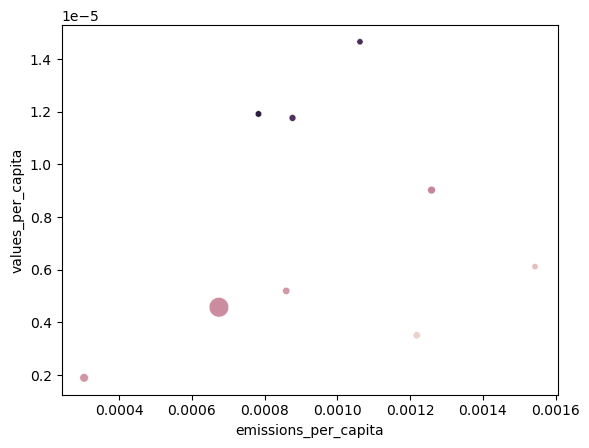

1991


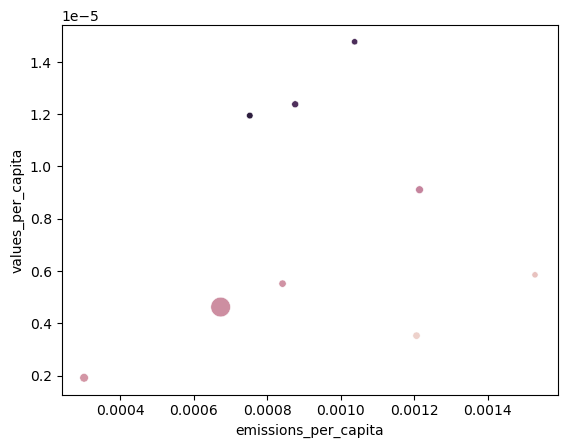

1992


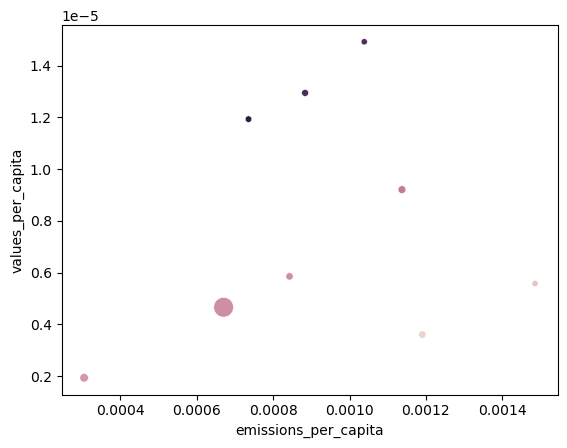

1993


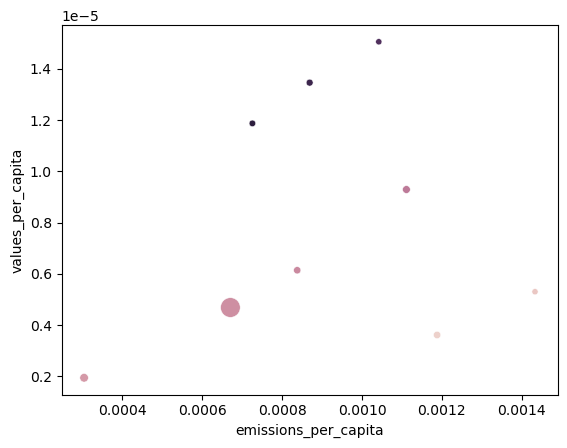

1994


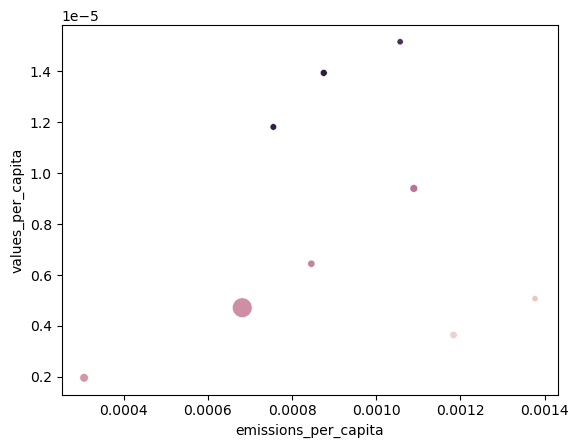

1995


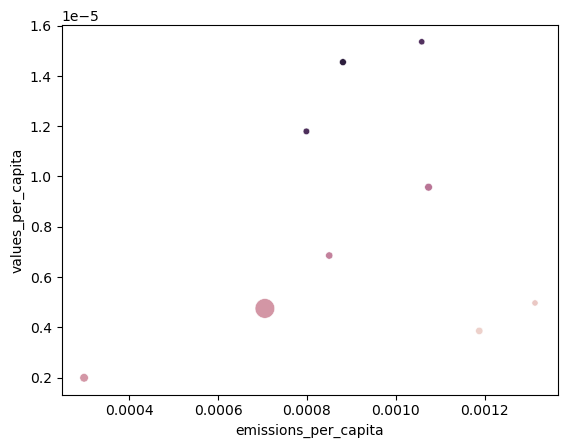

1996


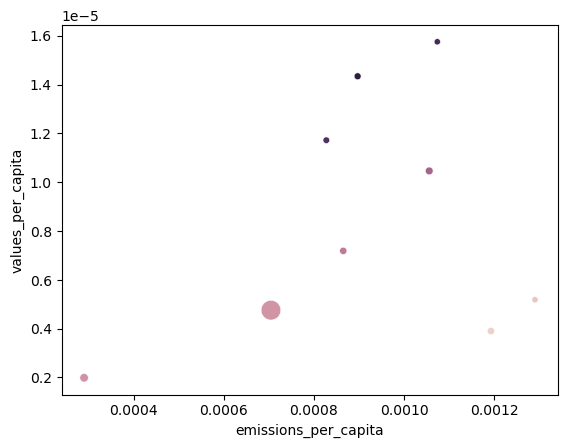

1997


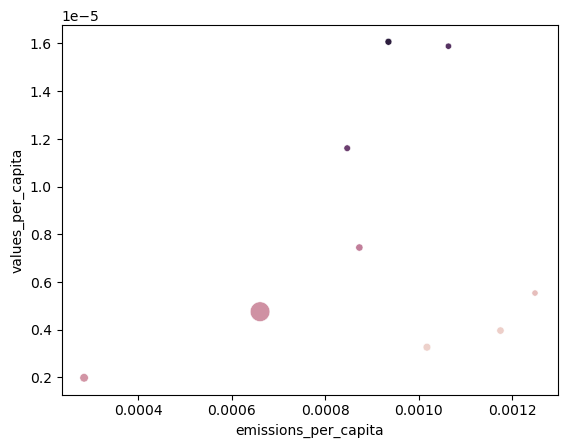

1998


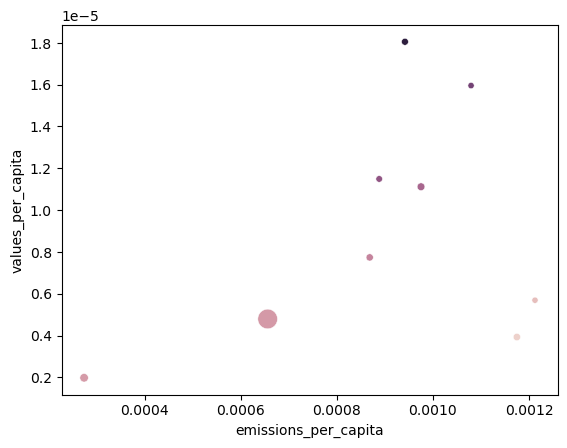

1999


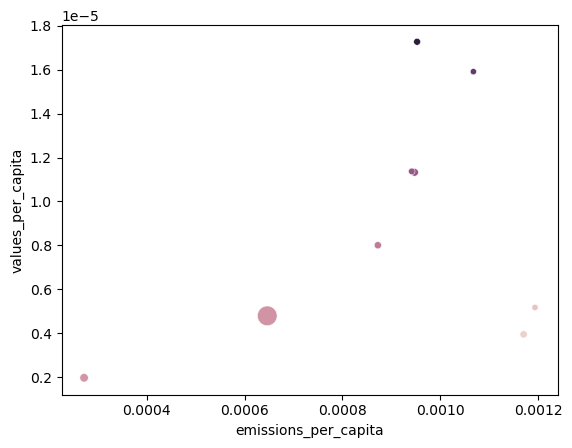

2000


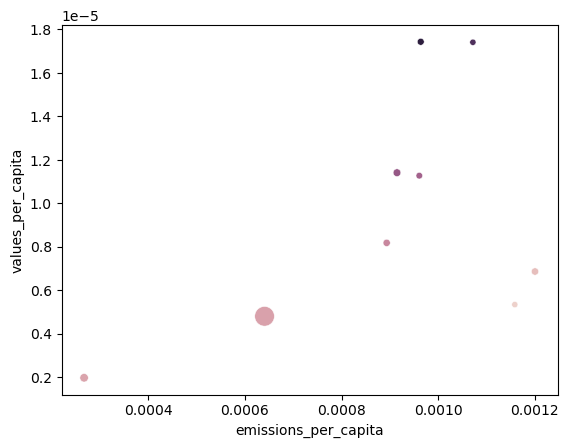

2001


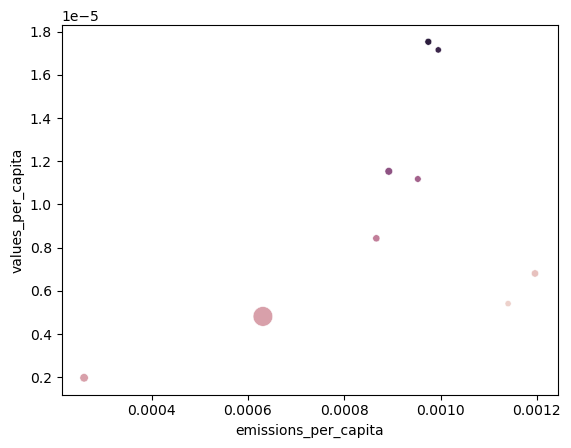

2002


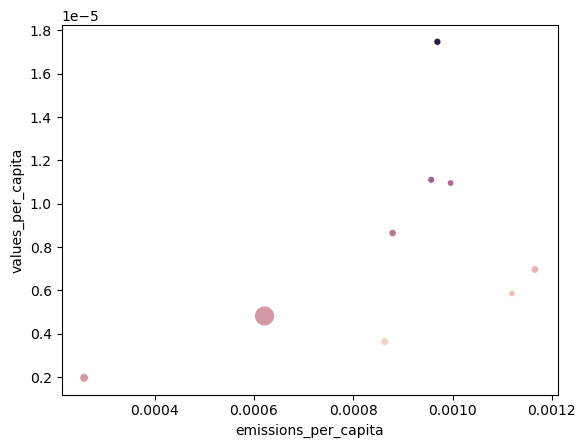

2003


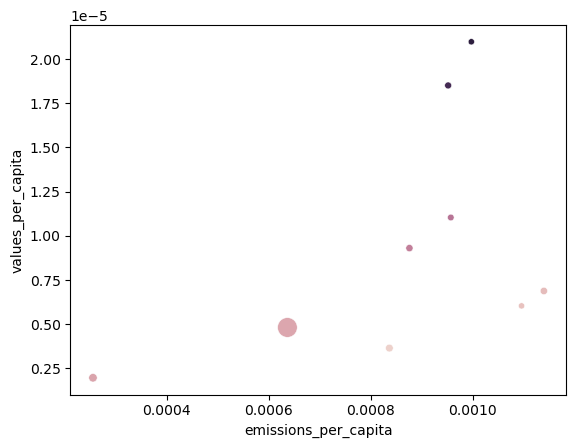

2004


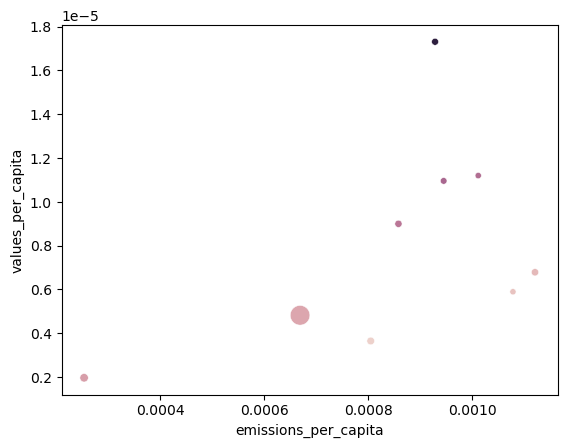

2005


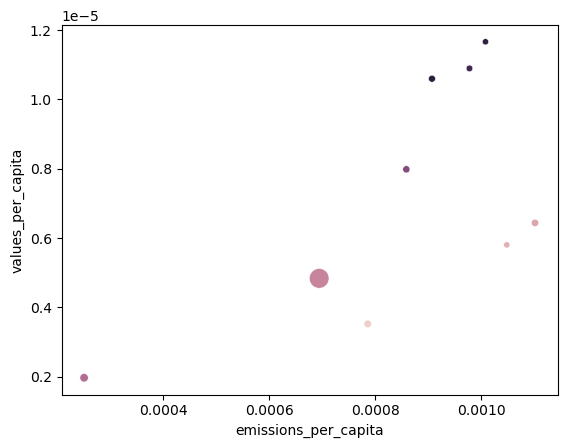

2006


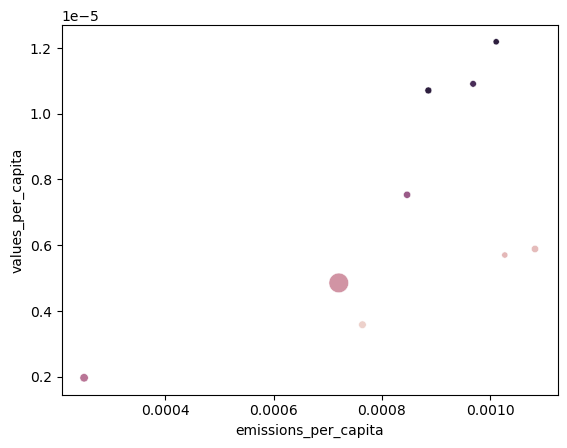

2007


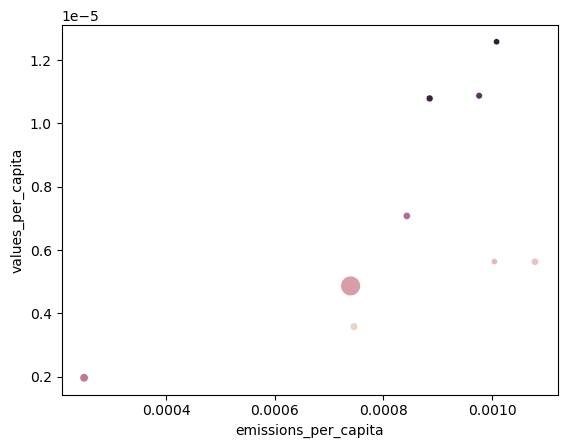

2008


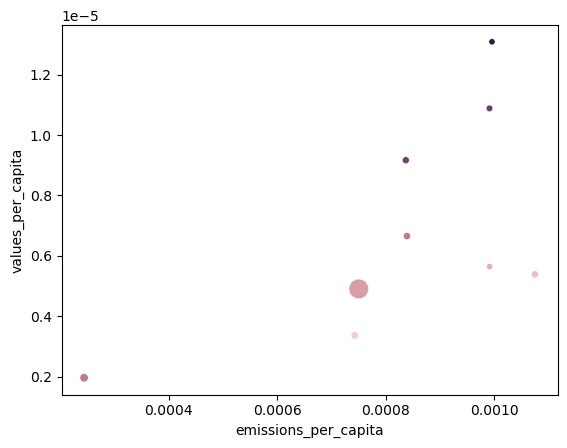

2009


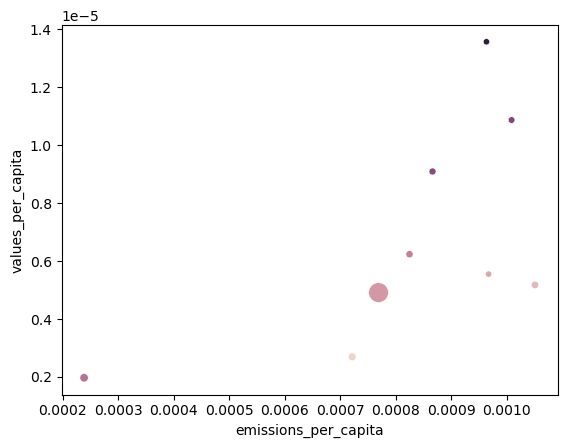

2010


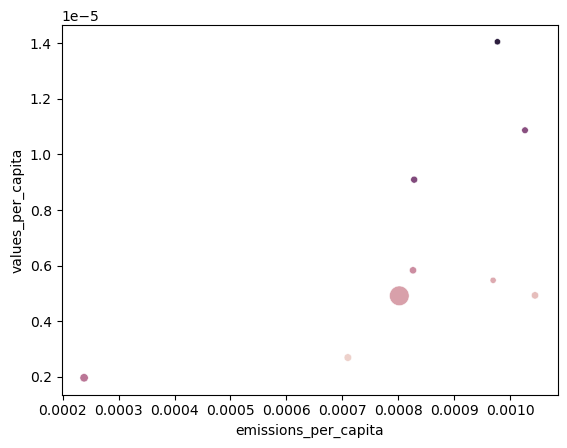

2011


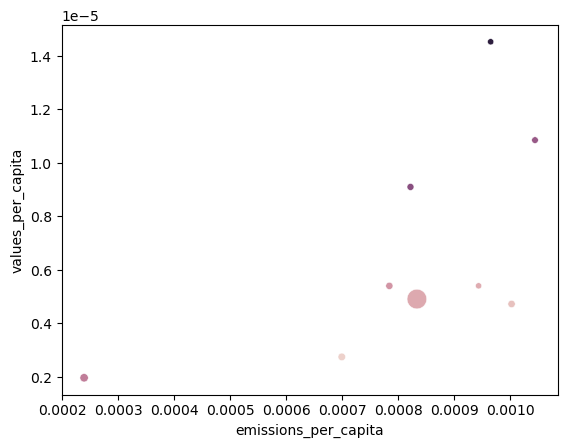

2012


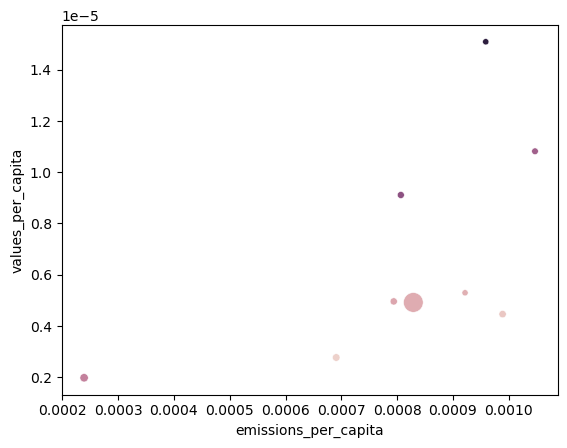

2013


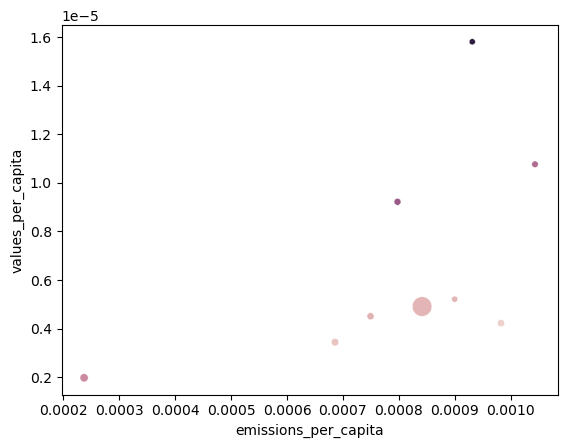

2014


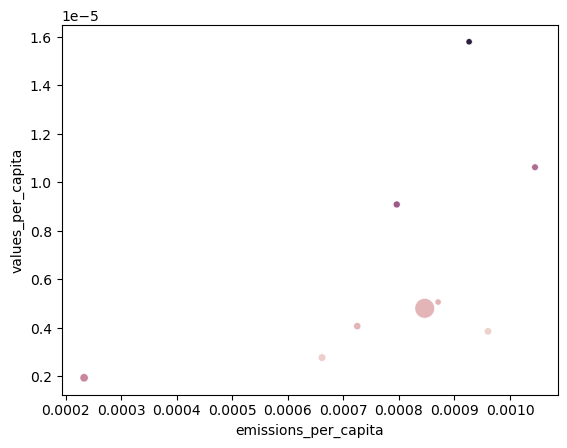

2015


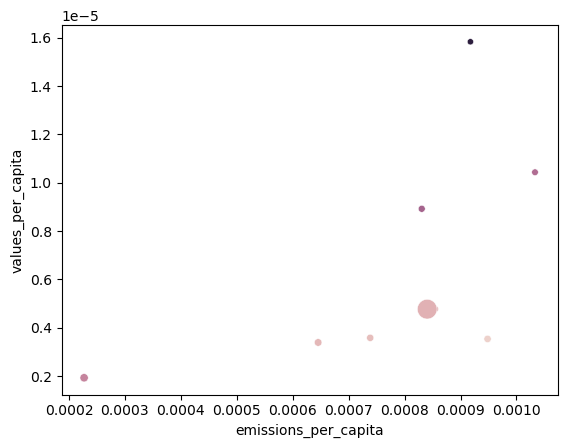

2016


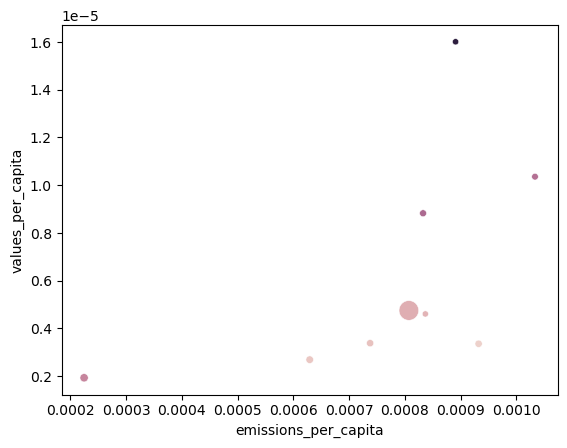

2017


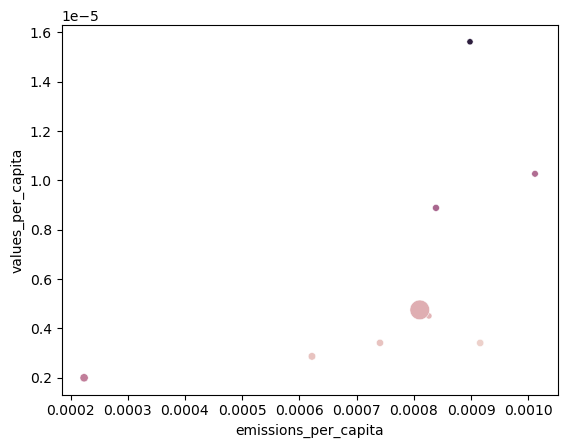

2018


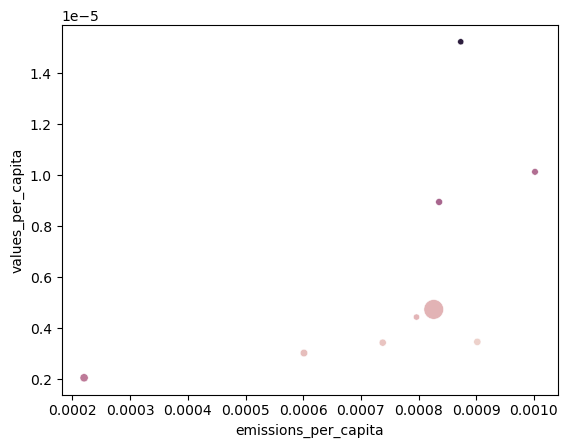

2019


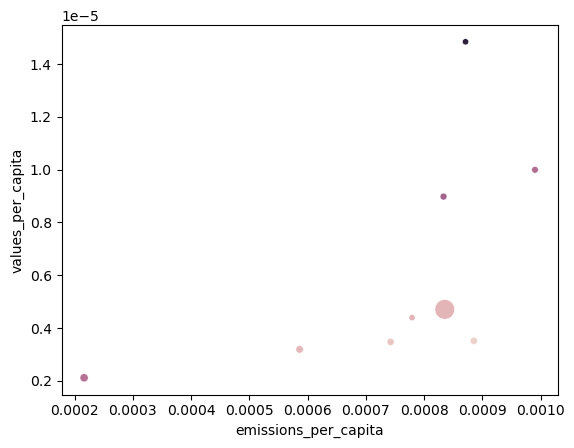

In [28]:
import seaborn as sns
YEARS = np.arange(1990, 2020)
COUNTRIES = ['France', 'China', 'Greece', 'Italy', 'Japan', 'Austria', 'Germany', 'Spain', 'United Kingdom', 'United States', 'Peru']
CAUSES = ['Waste - agri-food systems']
static_df = waste_emi_pop_gdp_df[(waste_emi_pop_gdp_df['cause'].isin(CAUSES))
                                 & (waste_emi_pop_gdp_df['country'].isin(COUNTRIES))]
static_df['emissions_per_capita'] = static_df['emission'] / static_df['population']
static_df['values_per_capita'] = static_df['value'] / static_df['population']
static_df['values_over_total'] = static_df['value'] / static_df['emission']
# static_df.plot.scatter(x='emissions_per_capita', y='values_per_capita')

for year in range(1990, 2020):
    print(year)
    df = static_df[static_df['year'] == year]
    g = sns.scatterplot(data=df, x='emissions_per_capita', y='values_per_capita',
                    size='population', hue='values_over_total', sizes=(20, 200))
    plt.legend([], [], frameon=False)
    plt.show()

# fig, axes = plt.subplots(4, 5, figsize=(15, 5))
# print(axes.shape)
# for i, y in enumerate(YEARS):
#     ax = axes[i]
#     df = static_df[static_df['year'] == y]
#     sns.scatterplot(data=df, x='emissions_per_capita', y='values_per_capita', size='population', hue='values_over_total', ax=ax)
#     ax.set_title(c)
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     ax.legend([], [], frameon=False)



In [29]:
waste_emi_pop_gdp_df.to_csv(HOME / 'F-dropna_waste_emi_pop_df.csv')